In [ ]:
import sys

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2019-09-11 18:51:50,063: get_random_city.py: 81:
	4 segments
	0 one-way
	2 two-way


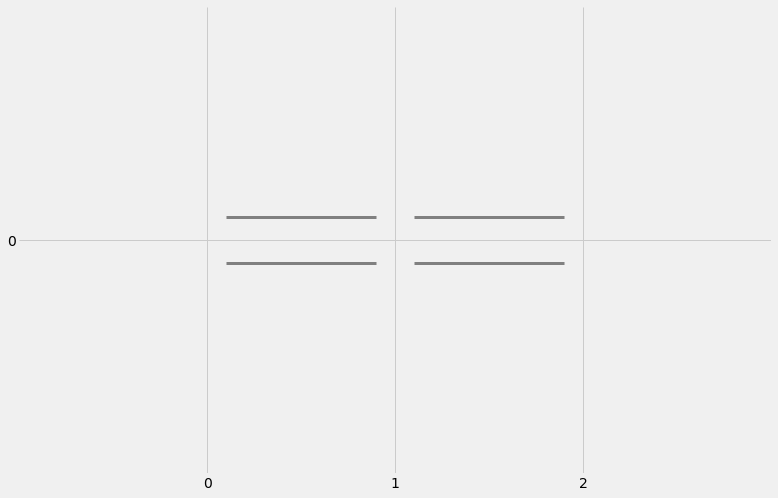

In [26]:
random_city = grc.get_random_city(
#     city_size=[12, 8],
#     frequencies=[0.3, 0.1, 0.1, 0.5]
    city_size=[3, 1],
    frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

In [27]:
# for e in sg.edges:
#     print(sg.get_edge_data(*e)['coordinates'])

In [28]:
3, 4 - 1, 2

(3, 3, 2)

INFO: 2019-09-11 18:51:57,016: visualise_graph.py: 133:
	2 dead ends
	0 disconnected nodes


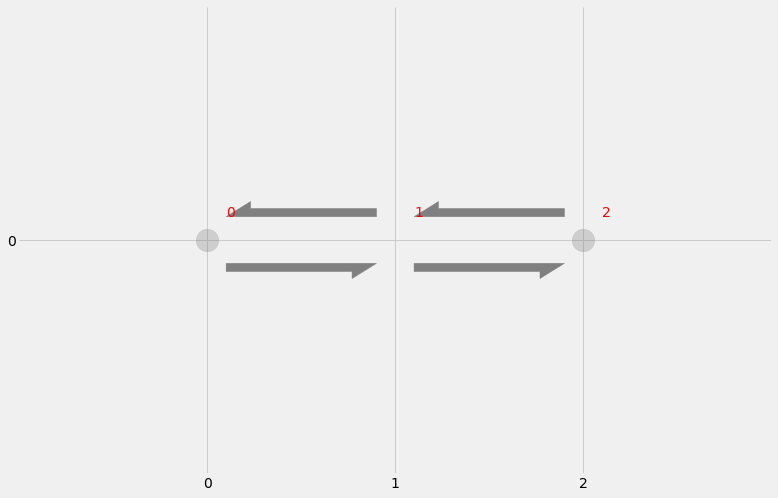

In [29]:
sg = gg.get_simple_graph(random_city)
vg.visualise_simple_graph(sg)

In [30]:
# fg.get_splitting_nodes(sg)

INFO: 2019-09-11 18:51:58,364: visualise_graph.py: 252:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 6
	right turns: 0
	left turns: 0
	u-turns: 4
	dead ends: 2


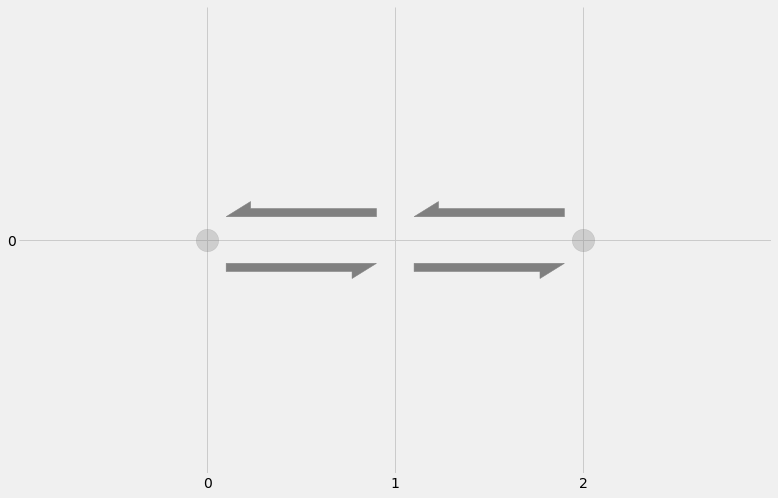

8
10


In [31]:
mg = gg.get_manoeuvre_graph(random_city)
vg.visualise_manoeuvre_graph(mg)
print(len(mg.nodes()))
print(len(mg.edges()))
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

INFO: 2019-09-11 18:52:38,502: forge_graph.py: 212:
removed 0 nodes
INFO: 2019-09-11 18:52:38,504: visualise_graph.py: 252:
	strongly connected: True
	disconnected nodes: 0
	straight drives: 6
	right turns: 0
	left turns: 0
	u-turns: 4
	dead ends: 2


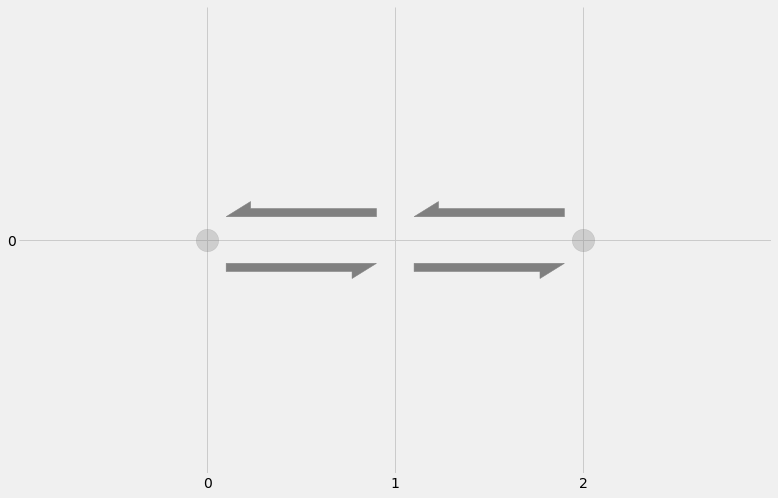

In [34]:
mg = fg.join_split_edges(mg)
vg.visualise_manoeuvre_graph(mg)

In [33]:
# splitting_nodes = []
# for n in mg.nodes():
#     if ((len(mg.in_edges(n))==1)
#         and (len(mg.out_edges(n))==1)):
#         segment_i = mg.get_edge_data(*list(mg.in_edges(n))[0])
#         segment_j = mg.get_edge_data(*list(mg.out_edges(n))[0])
#         if ((segment_i['manoeuvre'] == 'go_straight')
#             and (segment_j['manoeuvre'] == 'go_straight')):
#             splitting_nodes.append(n)
# print(splitting_nodes)

In [23]:
dg = gg.get_random_district_graph(mg)
vg.visualise_manoeuvre_graph(dg)

INFO: 2019-09-11 18:35:45,295: get_graph.py: 199:
district borders:
west-east: 10 - 22
south-north: 6 - 14


ValueError: min() arg is an empty sequence

In [24]:
dg = fg.add_connecting_grafts(dg, mg)
vg.visualise_manoeuvre_graph(dg)

NodeNotFound: Either source 0 or target 1 is not in G

In [ ]:
icg = gg.get_inverted_graph(random_city)
print(len(icg.nodes()))
print(len(icg.edges()))
vg.visualise_manoeuvre_graph(icg)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [ ]:
idg = gg.get_random_district_graph(icg)
vg.visualise_manoeuvre_graph(idg)

In [ ]:
idg = fg.add_connecting_grafts(idg, icg)
vg.visualise_manoeuvre_graph(idg)

In [ ]:
nx.is_strongly_connected(ig)

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
vis_g.visualise_graph(inverted_graph)

In [ ]:
import geopandas as gpd

In [ ]:
np.arange(0.5, 17.6 + 1.0, 1)

In [ ]:
[-1, 5] > [0, 1]